In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from ISLP import confusion_table
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_json("NBA_player_data.json")

In [3]:
position_mapping = {"PG": 1, "SG": 2, "SF": 3, "PF": 4, "C": 5}

data = data.drop(data.columns[0], axis=1)

In [4]:
features = ["AST", "TRB", "BLK", "STL", "TOV", "3PA","FTA"]
target = "Pos"

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [5]:
lda = LDA(store_covariance=True)

In [6]:
model = lda.fit(X_train,y_train)

In [7]:
model.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype='<U2')

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)

Training Accuracy: 0.46511627906976744
Testing Accuracy: 0.40476190476190477


c:\Users\14156\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
c:\Users\14156\.pyenv\pyenv-win\versions\3.11.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


In [8]:
lda_pred = model.predict(X_test)
cm = confusion_table(lda_pred,y_test)

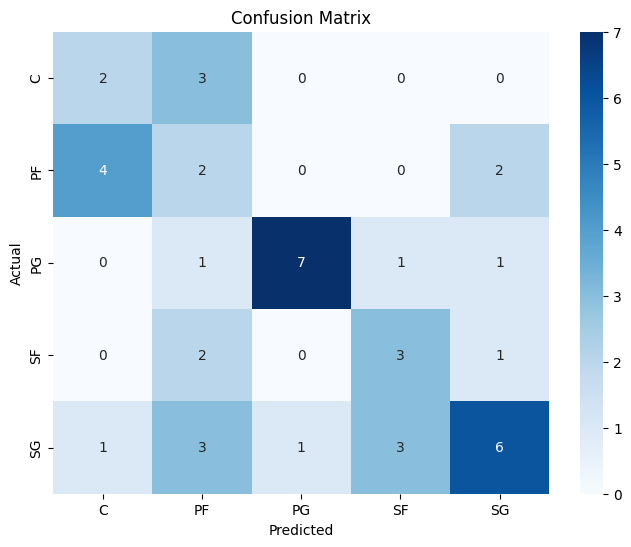

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

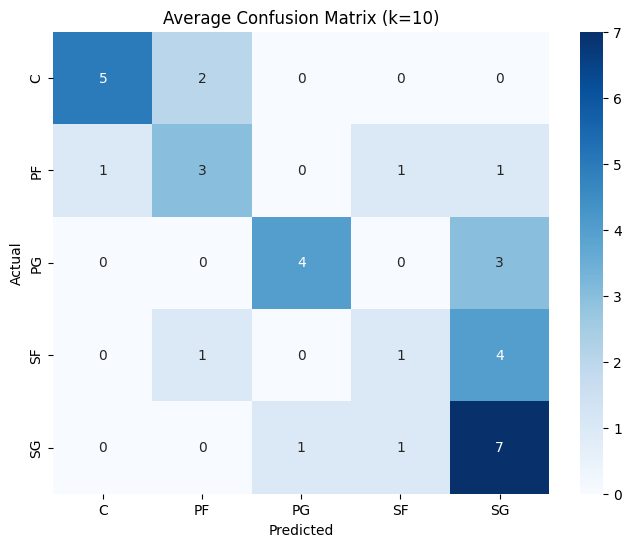

In [10]:
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize an empty array to store confusion matrices
conf_matrices = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit LDA model
    model = lda.fit(X_train, y_train)
    
    # Make predictions
    lda_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, lda_pred)
    conf_matrices.append(cm)

# Calculate the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0, dtype=int)

# Plot the average confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(avg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Average Confusion Matrix (k={k})')
plt.show()